# Análisis de los datos obtenidos 

Uso de ipython para el análsis y muestra de los datos obtenidos durante la producción.Se implementa un regulador experto. Los datos analizados son del día 18 de Agosto del 2015

Los datos del experimento:
* Hora de inicio: 16:08
* Hora final : 16:35
* Filamento extruido: 
* $T: 150ºC$
* $V_{min} tractora: 1.5 mm/s$
* $V_{max} tractora: 3.4 mm/s$
* Los incrementos de velocidades en las reglas del sistema experto son distintas:
    * En los caso 3 y 5 se mantiene un incremento de +2.
    * En los casos 4 y 6 se reduce el incremento a -1.

In [6]:
%pylab inline
#Importamos las librerías utilizadas
import numpy as np
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [7]:
#Mostramos las versiones usadas de cada librerías
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [8]:
#Abrimos el fichero csv con los datos de la muestra
datos = pd.read_csv('714159.CSV')

In [9]:
#Almacenamos en una lista las columnas del fichero con las que vamos a trabajar
columns = ['Diametro X','Diametro Y', 'VELOCIDAD']

In [10]:
#Mostramos un resumen de los datos obtenidoss
datos[columns].describe()
#datos.describe().loc['mean',['Diametro X [mm]', 'Diametro Y [mm]']]

,Diametro X,Diametro Y,VELOCIDAD
count,1164.000000,1164.000000,1164.000000
mean,1.627213,1.593894,1.992268
std,0.310200,0.307948,1.518772
min,0.014000,0.000342,0.750000
25%,1.459205,1.448464,0.750000
50%,1.608313,1.574887,0.750000
75%,1.860651,1.804748,2.500000
max,2.365326,2.275962,5.000000


Representamos ambos diámetro y la velocidad de la tractora en la misma gráfica

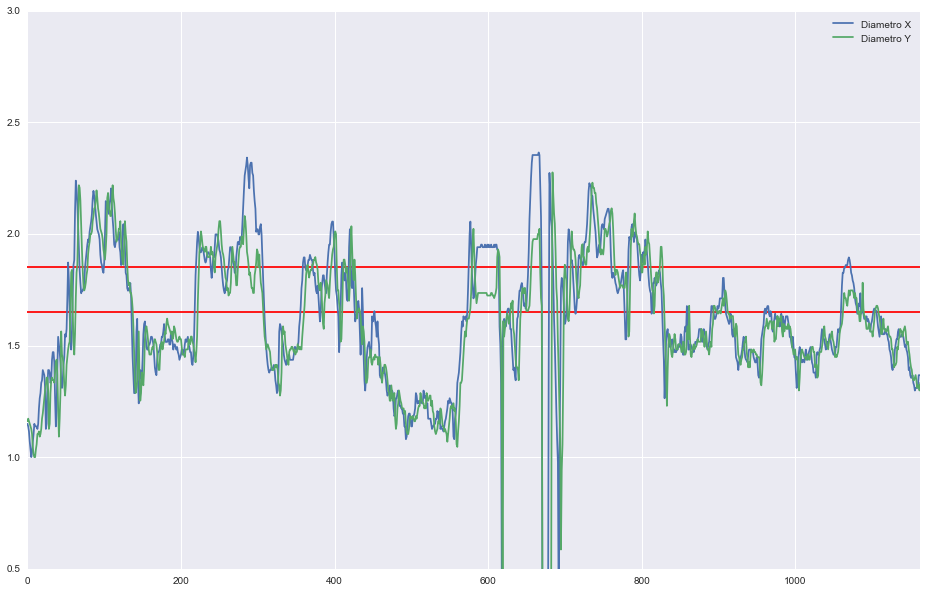

In [11]:
datos.ix[:, "Diametro X":"Diametro Y"].plot(figsize=(16,10),ylim=(0.5,3)).hlines([1.85,1.65],0,3500,colors='r')
#datos['RPM TRAC'].plot(secondary_y='RPM TRAC')

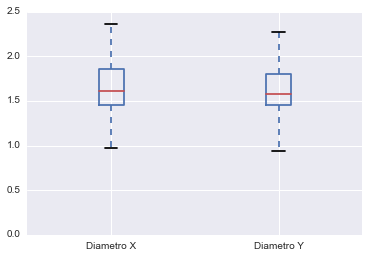

In [12]:
datos.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

Con esta segunda aproximación se ha conseguido estabilizar los datos. Se va a tratar de bajar ese porcentaje. Como cuarta  aproximación, vamos a  modificar las velocidades de tracción. El rango de velocidades propuesto es de 1.5 a 5.3, manteniendo los incrementos del sistema experto como en el actual ensayo.

Comparativa de Diametro X frente a Diametro Y para ver el ratio del filamento

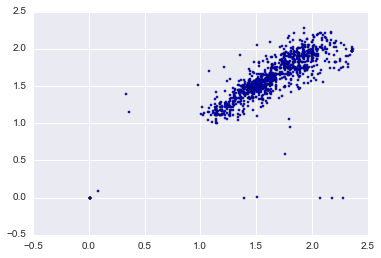

In [13]:
plt.scatter(x=datos['Diametro X'], y=datos['Diametro Y'], marker='.')

#Filtrado de datos
Las muestras tomadas $d_x >= 0.9$ or $d_y >= 0.9$ las asumimos como error del sensor, por ello las filtramos de las muestras tomadas.

In [14]:
datos_filtrados = datos[(datos['Diametro X'] >= 0.9) & (datos['Diametro Y'] >= 0.9)]

In [15]:
#datos_filtrados.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

##Representación de X/Y

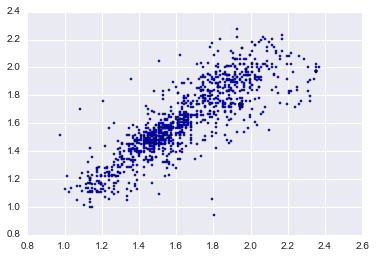

In [16]:
plt.scatter(x=datos_filtrados['Diametro X'], y=datos_filtrados['Diametro Y'], marker='.')

#Analizamos datos del ratio

In [17]:
ratio = datos_filtrados['Diametro X']/datos_filtrados['Diametro Y']
ratio.describe()

count    1148.000000
mean        1.019102
std         0.094005
min         0.635216
25%         0.963687
50%         1.007268
75%         1.056771
max         1.912769
dtype: float64

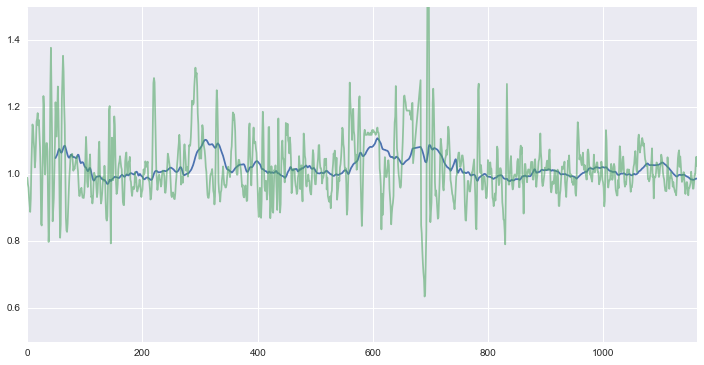

In [18]:
rolling_mean = pd.rolling_mean(ratio, 50)
rolling_std = pd.rolling_std(ratio, 50)
rolling_mean.plot(figsize=(12,6))
# plt.fill_between(ratio, y1=rolling_mean+rolling_std, y2=rolling_mean-rolling_std, alpha=0.5)
ratio.plot(figsize=(12,6), alpha=0.6, ylim=(0.5,1.5))

#Límites de calidad

Calculamos el número de veces que traspasamos unos límites de calidad. 
$Th^+ = 1.85$ and $Th^- = 1.65$ 

In [15]:
Th_u = 1.85
Th_d = 1.65

In [16]:
data_violations = datos[(datos['Diametro X'] > Th_u) | (datos['Diametro X'] < Th_d) |
                       (datos['Diametro Y'] > Th_u) | (datos['Diametro Y'] < Th_d)]

In [17]:
data_violations.describe()

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y,MARCHA,PARO,RPM EXTR,RPM TRAC
count,942.000000,942.000000,942.000000,942.000000,942,942,942,942.00000
mean,64.429299,151.112633,1.641566,1.620457,1,1,0,2.20265
std,1.698887,0.745685,0.302790,0.324456,0,0,0,0.91965
min,60.700000,149.700000,0.977470,0.000342,True,True,0,1.49750
25%,63.200000,150.500000,1.413326,1.436971,1,1,0,1.49750
50%,64.700000,151.000000,1.585374,1.563394,1,1,0,1.49750
75%,65.900000,151.700000,1.872121,1.885199,1,1,0,3.50000
max,66.900000,152.900000,2.583253,2.436864,True,True,0,3.50000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x08E5AFF0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0AF342D0>], dtype=object)

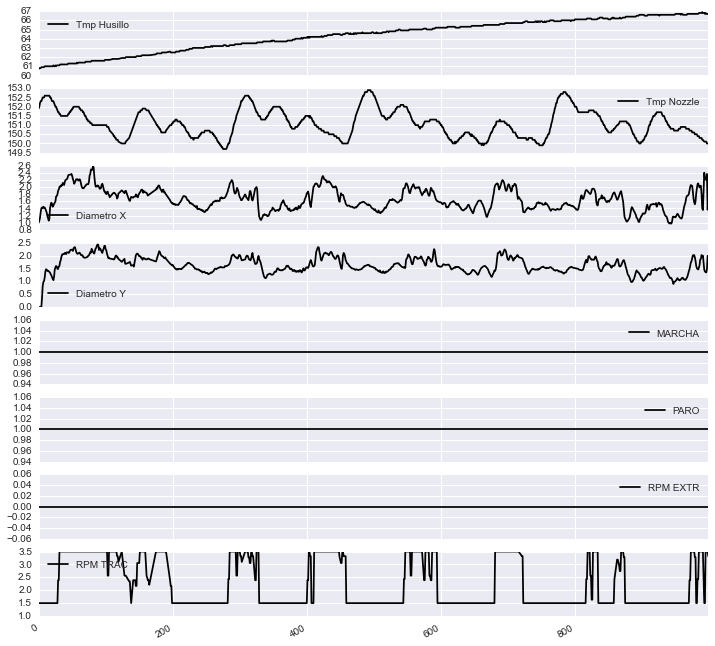

In [18]:
data_violations.plot(subplots=True, figsize=(12,12))